In [1]:
import pandas as pd
import datetime as dt
import json
import requests
import os
import matplotlib.pyplot as plt

data = "all_weather_by_hour_2023-2025_v1.csv"
weather=pd.read_csv(data)

In [2]:
weather

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1020.0,0.0,91.5,0.0,NaN,0.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.2,88.2,0.0,NaN,0.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.1,92.0,0.0,NaN,0.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.0,93.8,0.0,NaN,0.0,Overcast,cloudy,obs,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1030.0,NaN,100.0,0.0,0.0,0.0,Overcast,cloudy,obs,remote
608300,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.6,10.0,100.0,0.0,0.0,0.0,Overcast,cloudy,obs,33506099999
608301,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.0,NaN,99.6,0.0,0.0,0.0,Overcast,cloudy,obs,remote
608302,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.0,NaN,98.2,0.0,0.0,0.0,Overcast,cloudy,obs,remote


In [3]:
weather.head(10)

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1020.0,0.0,91.5,0.0,NaN,0.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.2,88.2,0.0,NaN,0.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.1,92.0,0.0,NaN,0.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.0,93.8,0.0,NaN,0.0,Overcast,cloudy,obs,remote
5,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.5,10.0,100.0,0.0,NaN,0.0,Overcast,cloudy,obs,33177099999;33301099999
6,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,10.0,100.0,0.0,NaN,0.0,Overcast,cloudy,obs,UKLR;33301099999
7,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,0.0,NaN,0.0,Overcast,cloudy,obs,UKLR;33301099999
8,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1024.2,4.4,100.0,NaN,NaN,NaN,"Snow, Overcast",rain,obs,33177099999;UKLR;33301099999
9,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1024.0,2.0,100.0,15.0,0.1,0.0,Overcast,cloudy,obs,UKLR;33301099999


In [4]:
weather.tail(10)

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
608294,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1030.4,10.0,90.0,347.9,1.3,3.0,Partially cloudy,partly-cloudy-day,obs,33506099999
608295,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1030.0,NaN,100.0,272.9,1.0,3.0,Overcast,cloudy,obs,remote
608296,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1030.0,NaN,100.0,157.3,0.6,2.0,Overcast,cloudy,obs,remote
608297,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.9,10.0,100.0,55.1,0.2,1.0,Overcast,cloudy,obs,33506099999
608298,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.0,NaN,100.0,2.8,0.0,0.0,Overcast,cloudy,obs,remote
608299,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1030.0,NaN,100.0,0.0,0.0,0.0,Overcast,cloudy,obs,remote
608300,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.6,10.0,100.0,0.0,0.0,0.0,Overcast,cloudy,obs,33506099999
608301,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.0,NaN,99.6,0.0,0.0,0.0,Overcast,cloudy,obs,remote
608302,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1029.0,NaN,98.2,0.0,0.0,0.0,Overcast,cloudy,obs,remote
608303,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,2.0,2025-03-01,1740780000,0.3,-6.9,...,1028.6,10.0,100.0,0.0,0.0,0.0,Overcast,cloudy,obs,33506099999


In [5]:
weather.columns

Index(['city_latitude', 'city_longitude', 'city_resolvedAddress',
       'city_address', 'city_timezone', 'city_tzoffset', 'day_datetime',
       'day_datetimeEpoch', 'day_tempmax', 'day_tempmin', 'day_temp',
       'day_feelslikemax', 'day_feelslikemin', 'day_feelslike', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipprob', 'day_precipcover',
       'day_snow', 'day_snowdepth', 'day_windgust', 'day_windspeed',
       'day_winddir', 'day_pressure', 'day_cloudcover', 'day_visibility',
       'day_solarradiation', 'day_solarenergy', 'day_uvindex', 'day_sunrise',
       'day_sunriseEpoch', 'day_sunset', 'day_sunsetEpoch', 'day_moonphase',
       'day_conditions', 'day_description', 'day_icon', 'day_source',
       'day_preciptype', 'day_stations', 'hour_datetime', 'hour_datetimeEpoch',
       'hour_temp', 'hour_feelslike', 'hour_humidity', 'hour_dew',
       'hour_precip', 'hour_precipprob', 'hour_snow', 'hour_snowdepth',
       'hour_preciptype', 'hour_windgust', 'hour_windsp

In [6]:
weather.describe()

,city_latitude,city_longitude,city_tzoffset,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,day_feelslike,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex
count,608304.000000,608304.000000,608304.0,6.083040e+05,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,...,608304.000000,608304.000000,608304.000000,608304.000000,608304.00000,331846.000000,608304.000000,603968.000000,521042.000000,603968.000000
mean,49.143238,30.142514,2.0,1.693217e+09,15.203232,6.253993,10.721077,14.287248,4.267318,9.254504,...,0.598141,23.769943,11.399938,189.830264,1016.91840,17.010448,64.811065,142.722294,0.595017,1.413903
std,1.337209,4.303973,0.0,2.748558e+07,10.592473,8.162055,9.207622,11.577354,9.929590,10.713666,...,2.615546,11.492758,6.517607,106.383976,8.68127,9.656796,37.318628,220.920973,0.828064,2.226545
min,46.472500,22.285100,2.0,1.645654e+09,-14.300000,-50.300000,-17.500000,-21.800000,-50.300000,-27.100000,...,0.000000,0.700000,0.000000,0.000000,973.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.292400,25.935500,2.0,1.669414e+09,5.900000,-0.200000,2.800000,3.800000,-3.800000,-0.100000,...,0.000000,14.800000,7.200000,98.000000,1011.20000,10.000000,30.000000,0.000000,0.000000,0.000000
50%,49.416800,30.737100,2.0,1.693256e+09,15.100000,6.100000,10.600000,15.100000,4.200000,9.900000,...,0.000000,22.300000,10.800000,191.900000,1016.60000,15.800000,80.000000,5.600000,0.100000,0.000000
75%,50.253600,34.551700,2.0,1.717016e+09,24.600000,13.200000,18.800000,24.600000,13.200000,18.800000,...,0.000000,31.000000,15.100000,287.200000,1022.00000,24.100000,99.900000,218.300000,1.000000,2.000000
max,51.493700,37.814500,2.0,1.740780e+09,60.400000,27.200000,33.200000,60.400000,28.000000,33.900000,...,107.000000,230.400000,90.000000,360.000000,1050.00000,75.000000,100.000000,952.000000,3.400000,10.000000


In [7]:
weather.shape

(608304, 65)

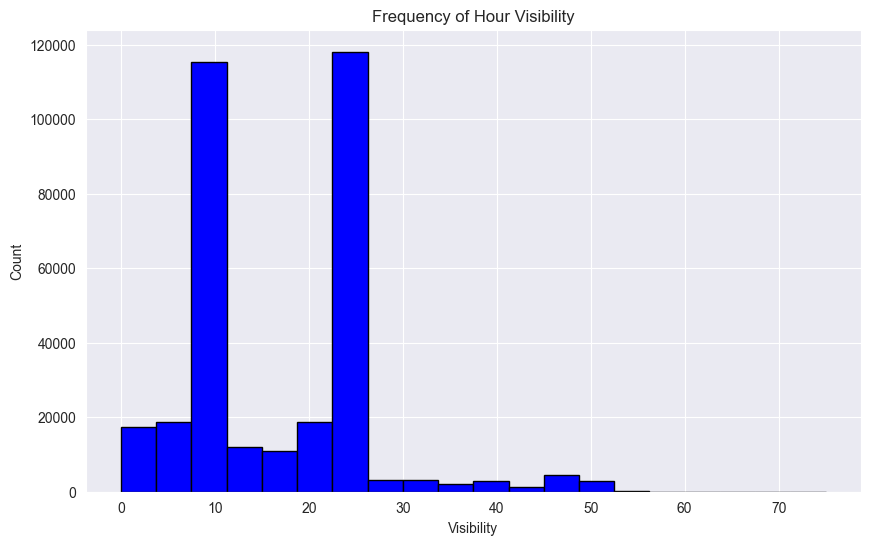

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(weather['hour_visibility'],bins=20, color='blue', edgecolor='black')
plt.title('Frequency of Hour Visibility')
plt.xlabel('Visibility')
plt.ylabel('Count')
plt.show()

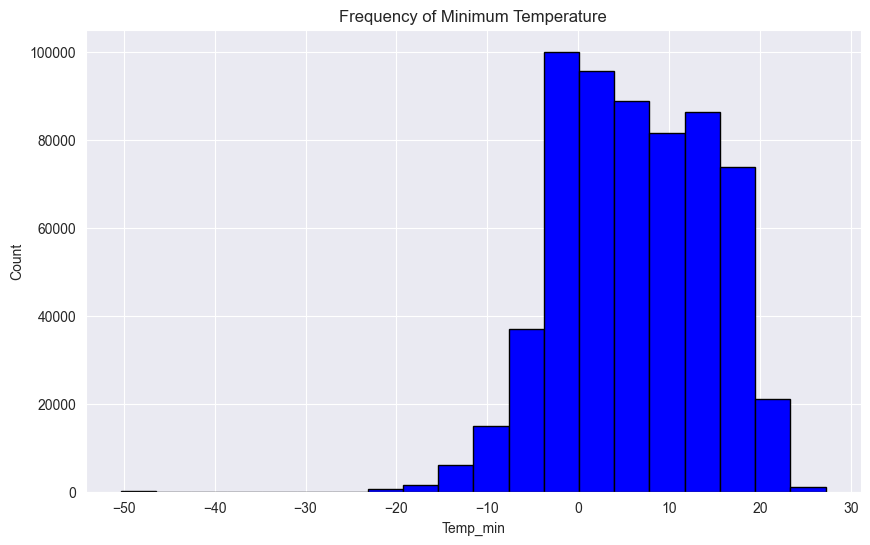

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(weather['day_tempmin'],bins=20, color='blue', edgecolor='black')
plt.title('Frequency of Minimum Temperature')
plt.xlabel('Temp_min')
plt.ylabel('Count')
plt.show()

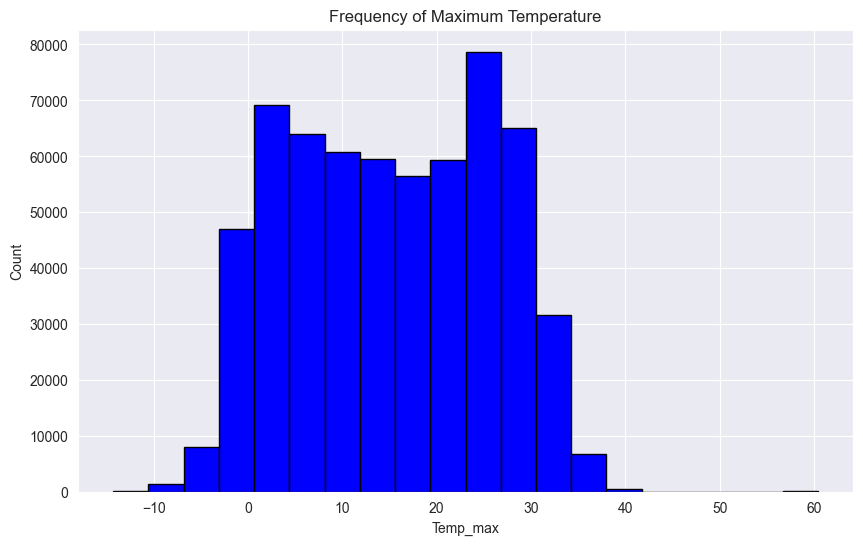

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(weather['day_tempmax'],bins=20, color='blue', edgecolor='black')
plt.title('Frequency of Maximum Temperature')
plt.xlabel('Temp_max')
plt.ylabel('Count')
plt.show()

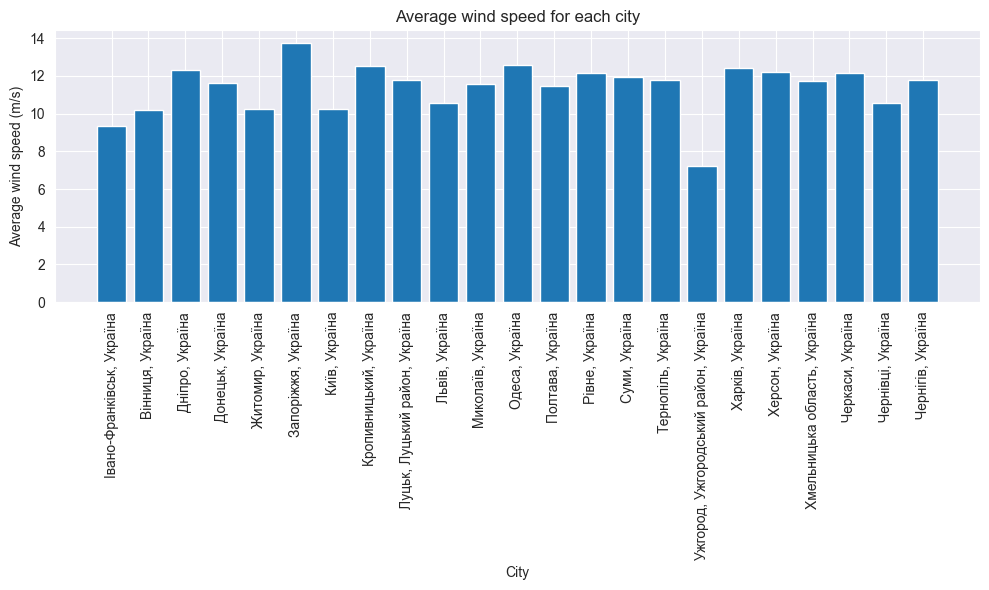

In [11]:
plt.figure(figsize=(10, 6))
city_avg_wind_speed = weather.groupby('city_resolvedAddress')['hour_windspeed'].mean()
city_names = city_avg_wind_speed.index
plt.bar(city_names, city_avg_wind_speed)
plt.xlabel('City')
plt.ylabel('Average wind speed (m/s)')
plt.title('Average wind speed for each city')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

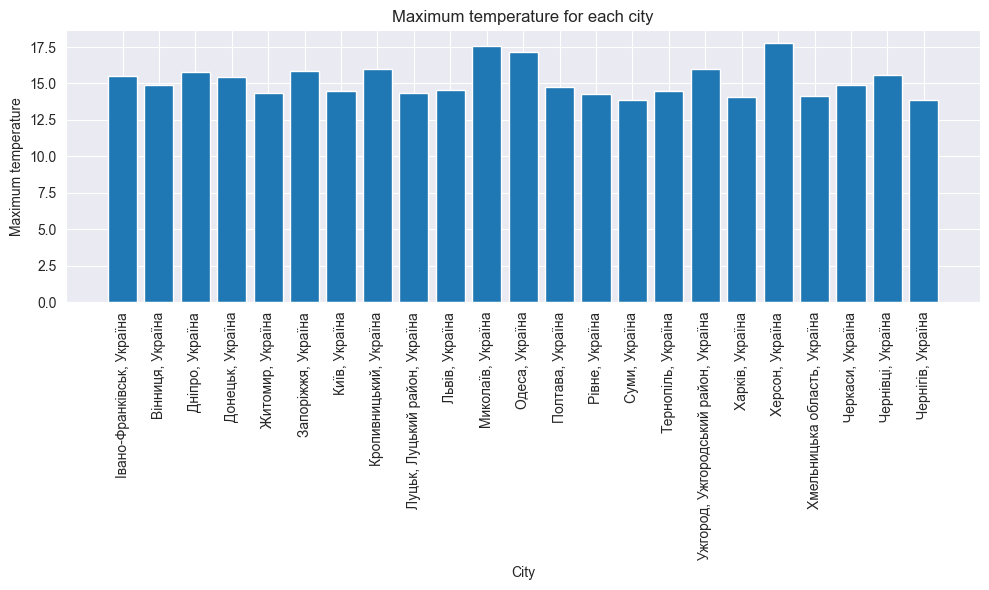

In [12]:
plt.figure(figsize=(10, 6))
city_temp_max = weather.groupby('city_resolvedAddress')['day_tempmax'].mean()
city_names = city_temp_max.index
plt.bar(city_names, city_temp_max)
plt.xlabel('City')
plt.ylabel('Maximum temperature')
plt.title('Maximum temperature for each city')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

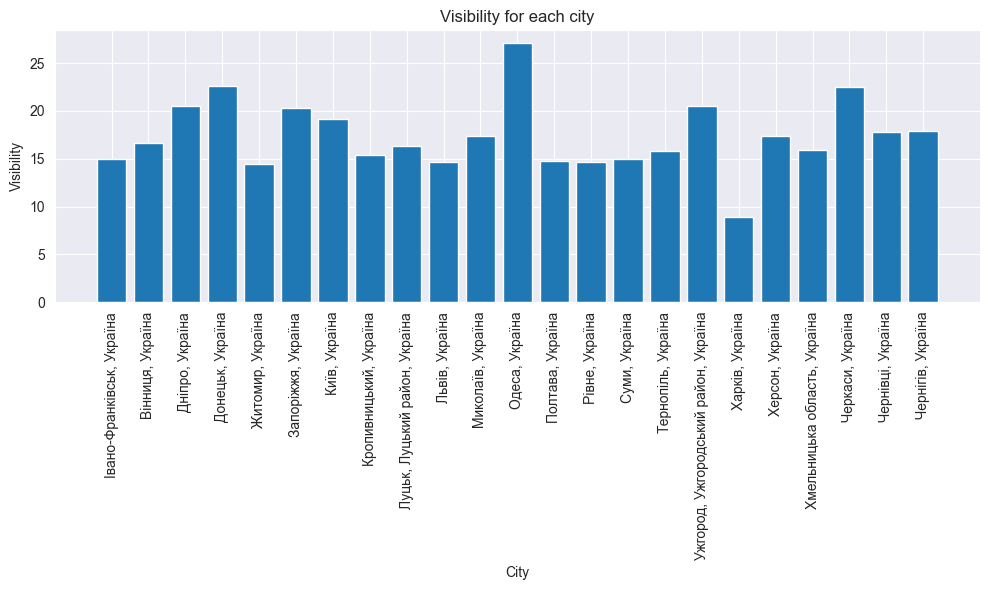

In [13]:
plt.figure(figsize=(10, 6))
city_visibility = weather.groupby('city_resolvedAddress')['hour_visibility'].mean()
plt.bar(city_names, city_visibility)
plt.xlabel('City')
plt.ylabel('Visibility')
plt.title('Visibility for each city')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

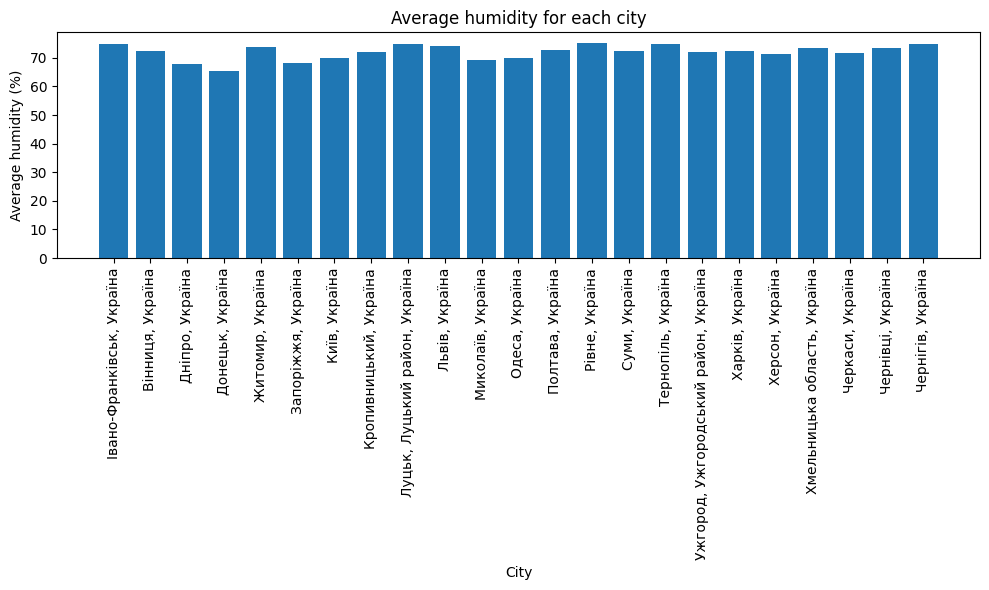

In [14]:
plt.figure(figsize=(10, 6))
city_avg_humidity = weather.groupby('city_resolvedAddress')['hour_humidity'].mean()
city_names = city_avg_humidity.index
plt.bar(city_names, city_avg_humidity)
plt.xlabel('City')
plt.ylabel('Average humidity (%)')
plt.title('Average humidity for each city')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


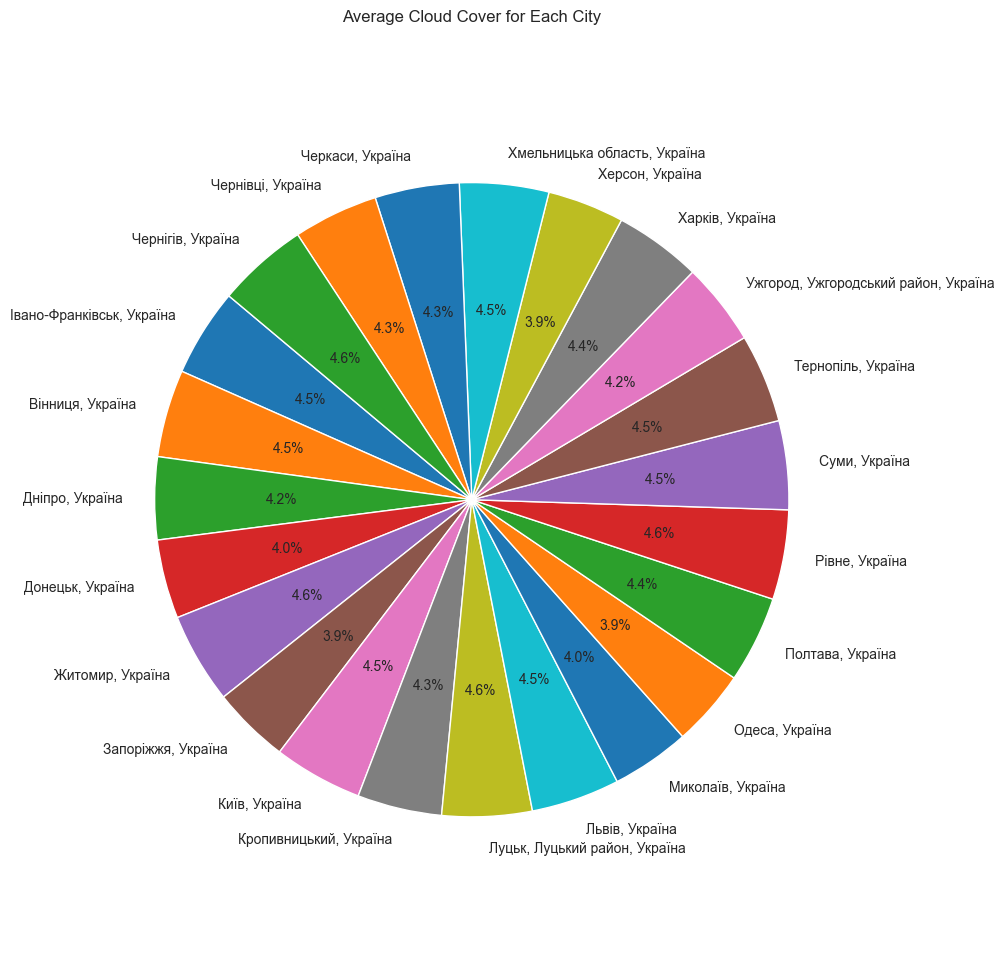

In [15]:
plt.figure(figsize=(10, 10))
city_avg_cloud = weather.groupby('city_resolvedAddress')['hour_cloudcover'].mean()
plt.pie(city_avg_cloud, labels=city_avg_cloud.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Cloud Cover for Each City')
plt.axis('equal') 
plt.tight_layout()
plt.show()
